# Homework 1 - Data Cleaning/Visualization
#### Canyen Heimuli, ECON 213R, Jan. 31, 2019

For this homework, I will be collecting, cleaning, and visualizing datasets of three different sources: one .csv file, one json text, and one API.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
from collections import Counter

## Data Source 1
#### Ideology Scores of House Representatives (112th to 115th US Congresses)

The first dataset I'll be working with is a subset of the "ideology scores" of all US Presidents, Senators, Representatives, and Judges since the First Congress of the United States. I'll only be analying a subset of the data. Let's bring it in.

In [2]:
ideo_df = pd.read_csv("https://voteview.com/static/data/out/members/HSall_members.csv")
ideo_df.head(10)

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0,USA,5000,NaN,NaN,"WASHINGTON, George",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,4766,1,98,CT,5000,0.0,1.0,"HUNTINGTON, Benjamin",...,1800.0,0.639,0.304,-29.04670,0.708,84.0,12.0,NaN,0.649,0.229
2,1,House,8457,1,98,CT,5000,0.0,1.0,"SHERMAN, Roger",...,1793.0,0.589,0.307,-40.59580,0.684,107.0,18.0,NaN,0.614,0.298
3,1,House,9062,1,98,CT,5000,0.0,1.0,"STURGES, Jonathan",...,1819.0,0.531,0.448,-25.87361,0.724,80.0,13.0,NaN,0.573,0.529
4,1,House,9489,1,98,CT,5000,0.0,1.0,"TRUMBULL, Jonathan, Jr.",...,1809.0,0.692,0.246,-30.47113,0.750,106.0,11.0,NaN,0.749,0.166
5,1,House,9706,1,98,CT,5000,0.0,1.0,"WADSWORTH, Jeremiah",...,1804.0,0.738,0.206,-16.56694,0.825,86.0,5.0,NaN,0.770,0.146
6,1,House,9676,11,1,DE,5000,0.0,1.0,"VINING, John",...,1802.0,0.433,-0.264,-31.60966,0.714,94.0,18.0,NaN,0.430,-0.462
7,1,House,379,44,2,GA,4000,0.0,1.0,"BALDWIN, Abraham",...,1807.0,-0.165,-0.373,-28.55029,0.758,103.0,12.0,NaN,-0.429,-0.817
8,1,House,4854,44,1,GA,4000,0.0,1.0,"JACKSON, James",...,1806.0,-0.320,-0.181,-24.89986,0.776,98.0,9.0,NaN,-0.559,-0.052
9,1,House,6071,44,3,GA,4000,0.0,1.0,"MATHEWS, George",...,1812.0,-0.428,-0.317,-12.62728,0.880,99.0,2.0,NaN,-0.413,-0.232


In [3]:
ideo_df.describe()

,congress,icpsr,state_icpsr,district_code,party_code,occupancy,last_means,born,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
count,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,48215.000000,48215.000000,49168.000000,39024.000000,49142.000000,49142.000000,48139.000000,48139.000000,48139.000000,48139.000000,0.0,48905.000000,48905.000000
mean,68.663479,9438.374149,33.510476,9.330828,228.474895,0.131577,1.225096,1873.412890,1927.173688,0.004914,0.015566,-102.349570,0.750272,373.057999,46.210993,NaN,0.004014,0.013605
std,30.164399,9931.723362,20.453083,16.446524,665.874174,0.526820,0.671743,57.349621,53.385072,0.373595,0.466537,94.464473,0.097311,325.591000,43.935748,NaN,0.391670,0.491359
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1721.000000,1790.000000,-1.000000,-1.000000,-1135.015230,0.160000,1.000000,0.000000,NaN,-1.000000,-1.000000
25%,47.000000,3594.000000,14.000000,1.000000,100.000000,0.000000,1.000000,1831.000000,1890.000000,-0.329000,-0.301000,-141.656600,0.688000,125.000000,16.000000,NaN,-0.339000,-0.331000
50%,72.000000,7246.500000,33.000000,5.000000,100.000000,0.000000,1.000000,1876.000000,1931.000000,-0.040500,-0.010000,-69.673370,0.753000,232.000000,31.000000,NaN,-0.036000,-0.005000
75%,94.000000,10804.250000,48.000000,10.000000,200.000000,0.000000,1.000000,1923.000000,1970.000000,0.346000,0.312000,-36.204150,0.817000,537.000000,63.000000,NaN,0.351000,0.349000
max,116.000000,99999.000000,99.000000,99.000000,8888.000000,7.000000,7.000000,1989.000000,2018.000000,1.000000,1.000000,-0.000050,0.999970,1434.000000,498.000000,NaN,1.000000,1.000000


This is a lot of data, and much of it is historical. I am only interested in House member ideologies of the past few Congresses, from about the 112th to the 115th. I condense the data here:

In [4]:
#Condenses data to House Members from 112th to 115th Congresses
ideo_df = ideo_df[ideo_df.congress > 106]
ideo_df = ideo_df[ideo_df.congress != 116]
ideo_df = ideo_df[ideo_df.chamber == "House"]

In [5]:
print(ideo_df.describe())

          congress         icpsr  state_icpsr  district_code   party_code  \
count  3998.000000   3998.000000  3998.000000    3998.000000  3998.000000   
mean    111.008004  23450.925713    40.258379      10.104302   152.004002   
std       2.582719   7857.582874    21.069313      10.475360    50.257480   
min     107.000000   2605.000000     1.000000       1.000000   100.000000   
25%     109.000000  20319.000000    22.000000       3.000000   100.000000   
50%     111.000000  21133.000000    43.000000       6.000000   200.000000   
75%     113.000000  29377.000000    54.000000      13.000000   200.000000   
max     115.000000  99767.000000    82.000000      53.000000   328.000000   

         occupancy   last_means         born         died  nominate_dim1  \
count  3548.000000  3548.000000  3998.000000   126.000000    3997.000000   
mean      0.059752     1.020857  1952.394447  2011.412698       0.052074   
std       0.312024     0.142925    10.960787     4.304918       0.438875   
mi

With this data, I can visualize trends in ideology scores for the past few Congresses. First, I'll check if it has missing values in the key variable or in other data.

In [6]:
#Checks for missing values of the "ideology score" variable and other missing data
print((ideo_df[["nominate_dim1"]] == 0).sum())
ideo_df.columns[ideo_df.isnull().any()]

nominate_dim1    0
dtype: int64


Index(['occupancy', 'last_means', 'died', 'nominate_dim1', 'nominate_dim2',
       'nominate_log_likelihood', 'nominate_geo_mean_probability',
       'nominate_number_of_votes', 'nominate_number_of_errors', 'conditional',
       'nokken_poole_dim1', 'nokken_poole_dim2'],
      dtype='object')

Much of the data is missing at random, or otherwise does not require a value for analysis. The 'died' variable reads the year that a Representative died if he/she is deceased, so it does not need to be filled in. The same can be said for occupancy. I'll drop the 'died' variable as it doesn't matter here. Other data are just transformations of ideology variables. I'm not sure if they're missing at random or not...

The main variable that I'm interested in is the "nominate_dim1" variable which is an ideology score. To begin, I'll show a simple histogram of this variable to look for any patterns.

Text(0.5, 1.0, 'Distribution of House Ideology Scores - 106th - 115th US Congresses')

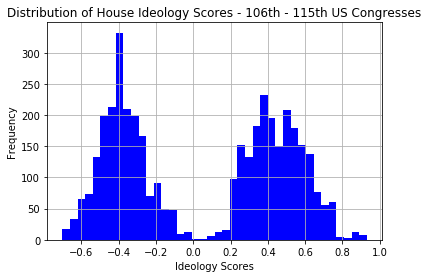

In [7]:
#Ideology Histogram (sometimes you have to run this code twice for the hist. to display...)
ideo_hist = ideo_df.hist('nominate_dim1', bins=40, facecolor='blue')
plt.xlabel('Ideology Scores')
plt.ylabel('Frequency')
plt.title('Distribution of House Ideology Scores - 106th - 115th US Congresses')

This histogram shows a clear ideological bridge between two camps within the House. It is likely that one direction of the ideology variable is more "conservative", and the other is more "liberal". 

Assuming that I didn't know which is which, I would need to investigate this. Let's say that I happen to know that Paul Ryan, the Speaker of the House in the 115th Congress, is a Republican. I would simply look at his party value (the party variable records numeric values) and conclude that number party is "Republican", and the other is Democrat. I would then similarly conclude that the sign of the mean ideology score represents the direction of the ideoology variable value that corresponds to being more 'conservative', or vice-versa for Democrats. 

Let's give that a try:

In [8]:
ideo_df_Ryan = ideo_df[ideo_df.bioname == "RYAN, Paul D."]
ideo_df_Ryan.head()

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
44324,107,House,29939,25,1,WI,200,0.0,1.0,"RYAN, Paul D.",...,NaN,0.556,-0.25,-122.57333,0.83074,661.0,56.0,NaN,0.499,-0.299
44868,108,House,29939,25,1,WI,200,0.0,1.0,"RYAN, Paul D.",...,NaN,0.556,-0.25,-131.59480,0.85289,827.0,60.0,NaN,0.569,-0.441
45409,109,House,29939,25,1,WI,200,0.0,1.0,"RYAN, Paul D.",...,NaN,0.556,-0.25,-180.60485,0.81540,885.0,82.0,NaN,0.604,-0.397
45960,110,House,29939,25,1,WI,200,0.0,1.0,"RYAN, Paul D.",...,NaN,0.556,-0.25,-218.95065,0.85180,1365.0,81.0,NaN,0.585,-0.427
46509,111,House,29939,25,1,WI,200,0.0,1.0,"RYAN, Paul D.",...,NaN,0.556,-0.25,-143.99454,0.86004,955.0,49.0,NaN,0.588,-0.278


It looks like the party_code value '200' corresponds to being in the Republican Party. The only other party_code value for House members is '100', which I will assume to be associated with being in the Democratic Party (forgive me, this was the only way I knew to solve this problem...). Let's compare the means of ideology scores within each party.

In [9]:
#Finds the Means!

ideo_df_rep = ideo_df[ideo_df.party_code == 200]
ideo_df_dem = ideo_df[ideo_df.party_code == 100]

print("Mean Ideology for Republicans:")
print(ideo_df_rep.loc[:,"nominate_dim1"].mean())
print("Mean Ideology for Democrats:")
print(ideo_df_dem.loc[:,"nominate_dim1"].mean())

Mean Ideology for Republicans:
0.4532068632189463
Mean Ideology for Democrats:
-0.3786720374220375


So it appears to be the case that 'conservatism' is related to having a positive Ideology Score, and vice versa for being more 'progressive'. 

To visualize this point and how it has (possibly) changed over time, I show a scatter plot of Ideology Scores within parties for about the past 20 years (the 106th Congress first met in 1999):

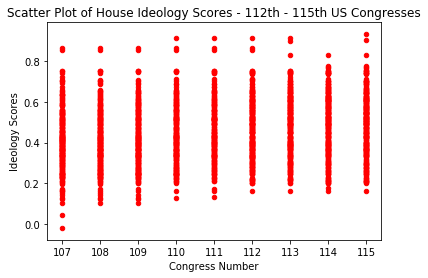

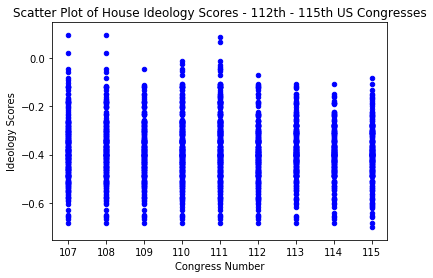

In [10]:
#Scatter Plot Code
ideo_df_reps = ideo_df[ideo_df.party_code == 200]
ideo_df_dems = ideo_df[ideo_df.party_code == 100]

ideo_scatter_reps = ideo_df_reps.plot.scatter('congress', 'nominate_dim1', color='red')
plt.xlabel('Congress Number')
plt.ylabel('Ideology Scores')
plt.title('Scatter Plot of House Ideology Scores - 112th - 115th US Congresses')

ideo_scatter_dems = ideo_df_dems.plot.scatter('congress', 'nominate_dim1', color='blue')
plt.xlabel('Congress Number')
plt.ylabel('Ideology Scores')
plt.title('Scatter Plot of House Ideology Scores - 112th - 115th US Congresses')
plt.show()

I was unable to add a "line of best fit" for either of the scatter plots, but I aver that a case can qualitatively be made that ideology has gotten more divergent, if only slightly.

While this graph is not exactly quantifiable, it is a good way to show in a simple way how ideological polarization in the House has happened over the past decade or so. 

## Data Source 2
#### Temperature Readings since 1880 Recorded as Anomalies Compared to a Base Period (1901-2000)

This is a simple two column dataset of temperature readings since 1880. Each observation is recorded in the form of a "temperature anomaly", or the temperature difference in that year compared to a "base period". The description of this dataset says that that base period is from the years 1901 to 2000. 

In [11]:
get_request = requests.get("https://www.ncdc.noaa.gov/cag/time-series/global/globe/land_ocean/ytd/12/1880-2016.json")
get_request.text

'{"description":{"title":"Global Land and Ocean Temperature Anomalies, January-December","units":"Degrees Celsius","base_period":"1901-2000","missing":-999},"data":{"1880":"-0.12","1881":"-0.07","1882":"-0.08","1883":"-0.15","1884":"-0.21","1885":"-0.23","1886":"-0.21","1887":"-0.25","1888":"-0.16","1889":"-0.11","1890":"-0.33","1891":"-0.26","1892":"-0.31","1893":"-0.32","1894":"-0.28","1895":"-0.23","1896":"-0.09","1897":"-0.12","1898":"-0.26","1899":"-0.12","1900":"-0.07","1901":"-0.14","1902":"-0.25","1903":"-0.34","1904":"-0.42","1905":"-0.29","1906":"-0.21","1907":"-0.37","1908":"-0.44","1909":"-0.43","1910":"-0.38","1911":"-0.43","1912":"-0.33","1913":"-0.32","1914":"-0.14","1915":"-0.07","1916":"-0.29","1917":"-0.31","1918":"-0.20","1919":"-0.19","1920":"-0.20","1921":"-0.14","1922":"-0.22","1923":"-0.20","1924":"-0.24","1925":"-0.14","1926":"-0.05","1927":"-0.14","1928":"-0.16","1929":"-0.29","1930":"-0.09","1931":"-0.07","1932":"-0.11","1933":"-0.24","1934":"-0.10","1935":"-0

According to the data description, each observation is a temperature anomaly in degrees celsius of that year's global temperature against the "base period" (the 1901-2000 average). It says the missing value indicator is '-99' so I'll watch for those while I'm cleaning the data later.

In [12]:
climate_dict = json.loads(get_request.text)
climate_dict.keys()

dict_keys(['description', 'data'])

In [13]:
climate_series = pd.Series(climate_dict['data'])
climate_series.head()

1880    -0.12
1881    -0.07
1882    -0.08
1883    -0.15
1884    -0.21
dtype: object

For simplicity's sake, I'll convert this series to a dataframe and give its columns variable names like this:

In [14]:
climate_df = climate_series.reset_index()
climate_df.columns = ['Year', 'Temp_Anom']
climate_df.head()

,Year,Temp_Anom
0,1880,-0.12
1,1881,-0.07
2,1882,-0.08
3,1883,-0.15
4,1884,-0.21


Now, I'll check for missing data.

In [15]:
climate_df.isna().sum()

Year         0
Temp_Anom    0
dtype: int64

In [16]:
climate_df.describe()

,Year,Temp_Anom
count,137,137
unique,137,78
top,1886,-0.14
freq,1,6


Fortunately, there are no missing values in this dataset for years or for temperature anomalies; none of the temperature values are equal to '-99'. Temperature data, at least in terms of yearly anomalies, has been collected exhaustively for 137 years. The data were kept in their string formats, so I use the code below to convert them to numeric values:

In [17]:
#Converts Data from "String" to Numeric:
climate_df['Year'] = pd.to_numeric(climate_df['Year'], errors='coerce')
climate_df['Temp_Anom'] = pd.to_numeric(climate_df['Temp_Anom'], errors='coerce')
climate_df.describe()

,Year,Temp_Anom
count,137.000000,137.000000
mean,1948.000000,0.047591
std,39.692569,0.312023
min,1880.000000,-0.440000
25%,1914.000000,-0.170000
50%,1948.000000,-0.050000
75%,1982.000000,0.230000
max,2016.000000,0.940000


Let's see what kinds of graphs we can make with this data. Something interesting to examine may be comparing the average temperature of the pre-"base period" period, the "base period", and the post-"base period" period. 

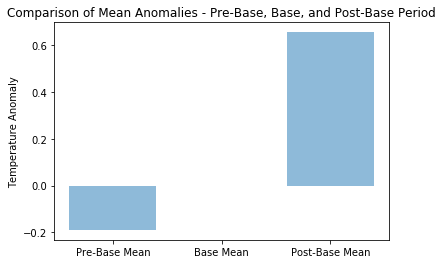

In [18]:
#Bar Chart of Mean Temperature Anomalies by Period
climate_df_prebase = climate_df[climate_df.Year < 1901]
climate_df_postbase = climate_df[climate_df.Year > 2000]

prebase_mean = (climate_df_prebase.loc[:,"Temp_Anom"].mean())
postbase_mean = (climate_df_postbase.loc[:,"Temp_Anom"].mean())

objects = ('Pre-Base Mean', 'Base Mean', 'Post-Base Mean')
anomalies = (prebase_mean, 0, postbase_mean)

plt.bar(objects, anomalies, align='center', alpha=0.5)
plt.xticks(objects)
plt.ylabel('Temperature Anomaly')
plt.title('Comparison of Mean Anomalies - Pre-Base, Base, and Post-Base Period')
 
plt.show()

This bar chart looks peculiar at first, but it shows how the Pre-Base period mean temperature anomalies (1880-1900) and the Post-Base period temperature anomalies (2000-2016) compared to the anomaly in the base period, which was zero. 

Lastly, I visualize what this data shows about how this factor has changed gradually over time instead of just between broadly categorized periods. See the scatter chart below:

Text(0.5, 1.0, 'Scatter Plot of Worldwide Temperature Anomalies - 1880 to 2016')

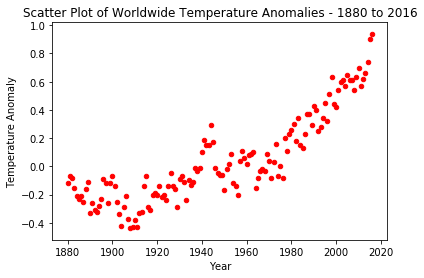

In [19]:
#Temperature Anomalies Scatterplot
climate_scatter = climate_df.plot.scatter('Year', 'Temp_Anom', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Scatter Plot of Worldwide Temperature Anomalies - 1880 to 2016')

While I was again unable to add a "best fit line" to this data, there is still a visible upward trend in worldwide temperature anomalies. 

This is particularly powerful data as it doesn't just show temperature increase, it shows anomalies against a base period that encompasses a long timespan which itself was quite hot. Data like this may be instrumental in refuting claims of regular earthwide "warming" and "cooling" cycles as an explanators of worldwide rising temperatures.

## Data Source 3
#### Cause of Death Data (CDC)

Are some causes of death quantifiably more likely or observable than others? If so, are Americans possibly more (or less) concerned about the wrong causes of death? I'll be bringing in data from the CDC to answer this question. 

In [74]:
get_request = requests.get("https://data.cdc.gov/api/views/bi63-dtpu/rows.json?accessType=DOWNLOAD")
death_dict = json.loads(get_request.text)
death_dict.keys()

dict_keys(['meta', 'data'])

In [75]:
death_cause = pd.DataFrame(death_dict['data'])
death_cause.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,15029,0E3080FB-5EF8-4BEF-834E-54B52DB8DFF3,15029,1534786069,1099577,1534786069,1099577,None,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,15030,5A6F1799-07FB-4C97-B6FC-A8BB792C5137,15030,1534786069,1099577,1534786069,1099577,None,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,15031,50D8F132-BD59-4267-A3F9-7179EF5C2628,15031,1534786069,1099577,1534786069,1099577,None,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,15032,ED9700FE-F7EB-4B51-A5ED-3C8B710CA2E8,15032,1534786069,1099577,1534786069,1099577,None,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,15033,E15E9F04-AD1B-4335-ACE3-86C7513FE862,15033,1534786069,1099577,1534786069,1099577,None,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32


It looks like the data imported in the correct format, but the columns/variable don't have any names. I have found out what the variable names are by browsing through the JSON text of the dataset on the API website given in the code above.

Here, I'll just get rid of the columns I won't use and correctly rename the important ones. 

In [76]:
#Preserve last 5 columns and rename them
death_cause = death_cause.iloc[:,8:]
death_cause = death_cause.rename(index=str, columns={8: "Year", 9: "Death_Case", 10: "Death_Type", 11: "State", 12: "Deaths", 13: "Age_Adj_Deathrate"})
death_cause.head(50)

,Year,Death_Case,Death_Type,State,Deaths,Age_Adj_Deathrate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32
5,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Colorado,2880,51.2
6,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Connecticut,1978,50.3
7,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Delaware,516,52.4
8,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,District of Columbia,401,58.3
9,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Florida,12561,54.9


The other variables that were not preserved were ones I took to be uninterpretable, or otherwise unimportant for analysis. The JSON text for this data says that the "Age-Adjusted Death Rate" for a death cause are recorded as per 100,000 persons (based on the 2000 US Census). The rates appear to differ from state to state as evidenced in the heading of the data shown above. Even Death Case can probably be thought of as a subset of Death Type, but I'll explore that more in a moment. 

Before I do anything else, I'll check for missing values using the code below:

In [77]:
#Check for any null values
death_cause.isna().sum()

Year                 0
Death_Case           0
Death_Type           0
State                0
Deaths               0
Age_Adj_Deathrate    0
dtype: int64

What a joy: there are no missing values.

Let's do a few simple visualizations of this dataset. I'll bet this data can show us broad patterns about how the number of deaths for certain causes has changed over time. Before I do this, I'll explore the data just a bit.

In [78]:
death_cause.describe()

,Year,Death_Case,Death_Type,State,Deaths,Age_Adj_Deathrate
count,10296,10296,10296,10296,10296,10296
unique,18,11,11,52,5741,2457
top,2010,"Nephritis, nephrotic syndrome and nephrosis (N...",CLRD,Hawaii,343,19.2
freq,572,936,936,198,15,37


It appears that all the data was imported in string format, even the numerical data. I convert it to numeric values using the code shown below:

In [79]:
#Converts Death Cause Data to Floats:
death_cause['Year'] = pd.to_numeric(death_cause['Year'], errors='coerce')
death_cause['Deaths'] = pd.to_numeric(death_cause['Deaths'], errors='coerce')
death_cause['Age_Adj_Deathrate'] = pd.to_numeric(death_cause['Age_Adj_Deathrate'], errors='coerce')
death_cause.describe()

,Year,Deaths,Age_Adj_Deathrate
count,10296.000000,1.029600e+04,10296.000000
mean,2007.500000,1.532668e+04,128.026428
std,5.188379,1.112160e+05,224.355281
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.060000e+02,19.200000
50%,2007.500000,1.704500e+03,35.800000
75%,2012.000000,5.678000e+03,153.025000
max,2016.000000,2.712630e+06,1087.300000


Looks like data on death causes has been recorded since the year 1999. I wonder if the same amount of data has been collected from year to year. I'll check using the code below.

In [80]:
Counter(death_cause['Year'])

Counter({2016: 572,
         2006: 572,
         2015: 572,
         2014: 572,
         2013: 572,
         2012: 572,
         2011: 572,
         2010: 572,
         2009: 572,
         2008: 572,
         2007: 572,
         2005: 572,
         2004: 572,
         2003: 572,
         2002: 572,
         2001: 572,
         2000: 572,
         1999: 572})

It is probably the case that the data collection began with a more or less exhaustive list of death types that were analyzed from year to year. I'll examine this with the same function, this time exploring Death Types:

In [81]:
Counter(death_cause['Death_Type'])

Counter({'Unintentional injuries': 936,
         'All causes': 936,
         "Alzheimer's disease": 936,
         'Cancer': 936,
         'CLRD': 936,
         'Diabetes': 936,
         'Heart disease': 936,
         'Influenza and pneumonia': 936,
         'Kidney disease': 936,
         'Stroke': 936,
         'Suicide': 936})

It looks like we have a lot of death causes that we could analyze here. I'll now just make sure that all the data looks good when it's organized by State using the code below:

In [82]:
#Check State Values
Counter(death_cause['State'])

Counter({'Alabama': 198,
         'Alaska': 198,
         'Arizona': 198,
         'Arkansas': 198,
         'California': 198,
         'Colorado': 198,
         'Connecticut': 198,
         'Delaware': 198,
         'District of Columbia': 198,
         'Florida': 198,
         'Georgia': 198,
         'Hawaii': 198,
         'Idaho': 198,
         'Illinois': 198,
         'Indiana': 198,
         'Iowa': 198,
         'Kansas': 198,
         'Kentucky': 198,
         'Louisiana': 198,
         'Maine': 198,
         'Maryland': 198,
         'Massachusetts': 198,
         'Michigan': 198,
         'Minnesota': 198,
         'Mississippi': 198,
         'Missouri': 198,
         'Montana': 198,
         'Nebraska': 198,
         'Nevada': 198,
         'New Hampshire': 198,
         'New Jersey': 198,
         'New Mexico': 198,
         'New York': 198,
         'North Carolina': 198,
         'North Dakota': 198,
         'Ohio': 198,
         'Oklahoma': 198,
         'Oregon': 1

It looks like the data is categorized by state, but it also contains total deaths throughout the country with the last value in this column: United States. I'd like to analyze total deaths first before we continue to compare causes across states.

Below, I make a function for showing basic visualizations of specified death causes:

In [83]:
#Function for Line Graph of Num. Deaths by Cause
def num_cause_byline(sp_cause):
    deathcause_sp = death_cause[death_cause.Death_Type == sp_cause]
    deathcause_sp1 = deathcause_sp[deathcause_sp.State == "United States"]
    print("Scatter Plot of Total Deaths by", sp_cause,"in the United States from 1999 to 2016")
    deathcause_scatter = deathcause_sp1.plot.line('Year', 'Deaths', color='black')
    plt.xlabel('Year')
    plt.ylabel('Num. Deaths')

Scatter Plot of Total Deaths by Unintentional injuries in the United States from 1999 to 2016


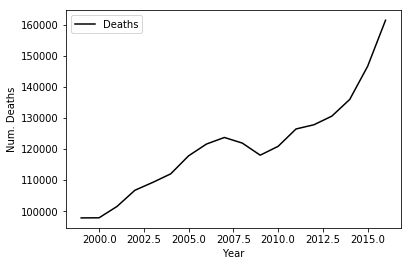

In [84]:
num_cause_byline("Unintentional injuries")

Scatter Plot of Total Deaths by Cancer in the United States from 1999 to 2016


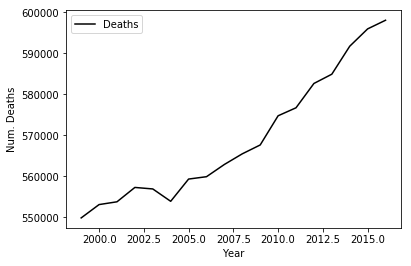

In [85]:
num_cause_byline("Cancer")

Scatter Plot of Total Deaths by Influenza and pneumonia in the United States from 1999 to 2016


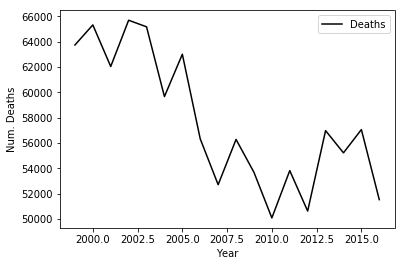

In [86]:
num_cause_byline("Influenza and pneumonia")

Scatter Plot of Total Deaths by Diabetes in the United States from 1999 to 2016


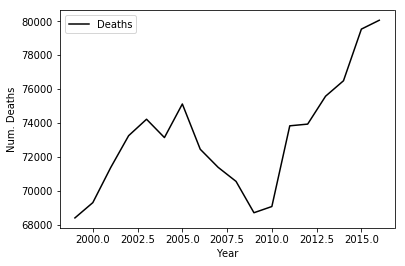

In [33]:
num_cause_byline("Diabetes")

Scatter Plot of Total Deaths by Suicide in the United States from 1999 to 2016


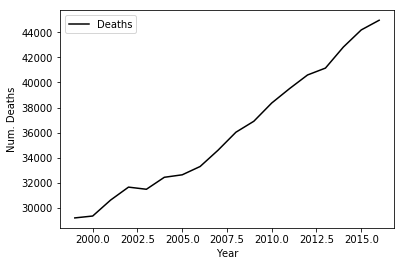

In [34]:
num_cause_byline("Suicide")

These graphs look alarming: Americans are more at risk of Diabetes, Cancer, and unintential injuries than they were in 1999! However, I have defined this function to show gross amount of deaths. Here, I'll make a new one that adjusts for the death rates of certain causes per 100,000 Americans. To distinguish, I'll show these new graphs in a different color.

In [35]:
#Function for Line Graph of Death Rate by Cause
def rate_cause_byline(sp_cause):
    deathcause_sp = death_cause[death_cause.Death_Type == sp_cause]
    deathcause_sp1 = deathcause_sp[deathcause_sp.State == "United States"]
    print("Scatter Plot of Death Rate of", sp_cause,"in the United States from 1999 to 2016")
    deathcause_scatter = deathcause_sp1.plot.line('Year', 'Age_Adj_Deathrate', color='orange')
    plt.xlabel('Year')
    plt.ylabel('Cause Death Rate')

Scatter Plot of Death Rate of Unintentional injuries in the United States from 1999 to 2016


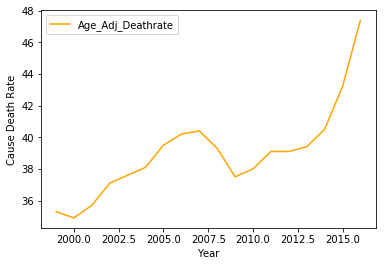

In [36]:
rate_cause_byline("Unintentional injuries")

Scatter Plot of Death Rate of Influenza and pneumonia in the United States from 1999 to 2016


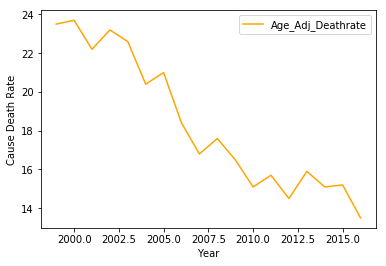

In [37]:
rate_cause_byline("Influenza and pneumonia")

Scatter Plot of Death Rate of Diabetes in the United States from 1999 to 2016


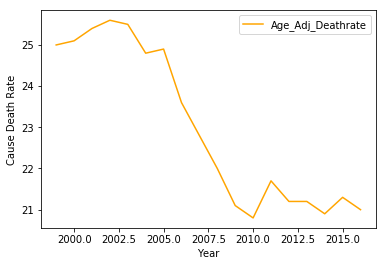

In [38]:
rate_cause_byline("Diabetes")

Scatter Plot of Death Rate of Cancer in the United States from 1999 to 2016


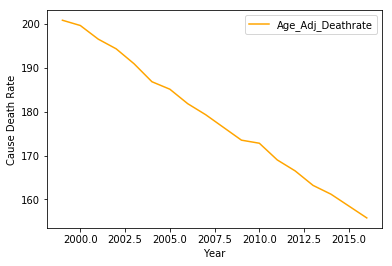

In [39]:
rate_cause_byline("Cancer")

Scatter Plot of Death Rate of Suicide in the United States from 1999 to 2016


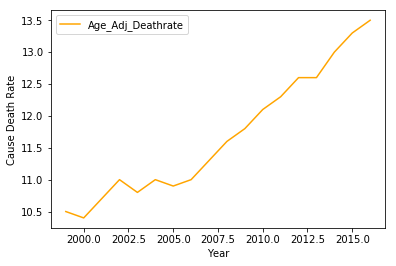

In [40]:
rate_cause_byline("Suicide")

So in reality, Americans today are statistically *less* at risk of dying by Influenza, Diabetes, or Cancer then they were in 1999 though the nominal number of deaths by these causes has increased. This is intuitive, and naturally refutes the graphs generated by the first function (it turns out deaths increase if more people are alive to be able to die...) 

Americans today, however, are more likely to die of unintential causes and suicide. These findings could potentially help public health workers and other organizations seeking to curb the most lethal causes of death in the United States.

Below is a simple function that returns the adjusted death rates for a type of death for a certain year and a certain state. I'll use this to compare Age-Adjusted Death Rates across certain states in recent years (sorry this is the only way I knew how to do this at this point):

In [102]:
#Comparing Age-Adjusted Death Rates across States and Time
def selected_array(year, type, state):
    deathcause_subs = death_cause[death_cause.Year == year]
    deathcause_subs1 = deathcause_subs[deathcause_subs.Death_Type == type]
    deathcause_subs2 = deathcause_subs1[deathcause_subs1.State == state]
    array = pd.crosstab(index=deathcause_subs2['Age_Adj_Deathrate'],
                                columns=deathcause_subs2['State'])
    print(array)

In [103]:
selected_array(2016, "Suicide", "Georgia")

State              Georgia
Age_Adj_Deathrate         
13.3                     1


In [104]:
selected_array(2016, "Suicide", "New York")

State              New York
Age_Adj_Deathrate          
8.1                       1


In [105]:
selected_array(2016, "Suicide", "California")

State              California
Age_Adj_Deathrate            
10.5                        1


In [106]:
selected_array(2016, "Suicide", "Michigan")

State              Michigan
Age_Adj_Deathrate          
13.3                      1


In [107]:
selected_array(2016, "Suicide", "Washington")

State              Washington
Age_Adj_Deathrate            
14.9                        1


In [108]:
selected_array(2016, "Suicide", "Illinois")

State              Illinois
Age_Adj_Deathrate          
10.7                      1


In [109]:
selected_array(2016, "Suicide", "Utah")

State              Utah
Age_Adj_Deathrate      
21.8                  1


Thus, there is apparently a lot of heterogeneity in the aggregated Age-Adjusted Death Rates across states. Utah saw many more deaths by suicide per 100,000 persons in 2016 than did California in the same year (ideally, I would have shown this data in a heatmap format - sorry).